In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive/",force_remount=True)

Mounted at /content/drive/


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Sat Feb 24 14:32:46 2024

@author: naile
"""

import pandas as pd
import os
os.chdir("/content/drive/MyDrive/common_voices_prompts_from_conformer_fastspeech2_pwg_ljspeech")
df=pd.DataFrame()
for i in os.listdir():
    if i==".ipynb_checkpoints":
      continue
    j=pd.read_csv(i)
    if i=="human.csv":
        j["lab"]=0
    else:
        j["lab"]=1
    df=pd.concat([df,j])
print(df[df["lab"]==0].count())
print(df[df["lab"]==1].count())

y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]
"""from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
b=BernoulliNB()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)
b.fit(X_train,y_train)
pred=b.predict(X_test)
acc=accuracy_score(y_test, pred)
print(acc*100)
f1=f1_score(y_test, pred)
print(f1)
print(confusion_matrix(y_test,pred))"""




filename               13100
mfcc_0                 13100
mfcc_1                 13100
mfcc_2                 13100
mfcc_3                 13100
mfcc_4                 13100
mfcc_5                 13100
mfcc_6                 13100
mfcc_7                 13100
mfcc_8                 13100
mfcc_9                 13100
mfcc_10                13100
mfcc_11                13100
mfcc_12                13100
mfcc_13                13100
mfcc_14                13100
mfcc_15                13100
mfcc_16                13100
mfcc_17                13100
mfcc_18                13100
mfcc_19                13100
tonnetz_0              13100
tonnetz_1              13100
tonnetz_2              13100
tonnetz_3              13100
tonnetz_4              13100
tonnetz_5              13100
spectral_contrast_0    13100
spectral_contrast_1    13100
spectral_contrast_2    13100
spectral_contrast_3    13100
spectral_contrast_4    13100
spectral_contrast_5    13100
spectral_contrast_6    13100
chromagram_0  

'from sklearn.model_selection import train_test_split\nfrom sklearn.naive_bayes import BernoulliNB\nfrom sklearn.metrics import accuracy_score,confusion_matrix,f1_score\nb=BernoulliNB()\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)\nb.fit(X_train,y_train)\npred=b.predict(X_test)\nacc=accuracy_score(y_test, pred)\nprint(acc*100)\nf1=f1_score(y_test, pred)\nprint(f1)\nprint(confusion_matrix(y_test,pred))'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df.shape

In [ ]:

X.shape

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dic={"Human":13100,"AI":117983}
sns.barplot(dic)
plt.show()
plt.pie(dic.values(),labels=dic.keys())
plt.show()




#Downsample Data

In [ ]:
from sklearn.svm import SVC

b=SVC()

y=df1.iloc[:,-1]
X=df1.iloc[:,:-1]
del X["filename"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=0)
b.fit(X_train,y_train)
pred=b.predict(X_test)
acc=accuracy_score(y_test, pred)
print(acc*100)
f1=f1_score(y_test, pred)
print(f1)
print(confusion_matrix(y_test,pred))





In [ ]:
pip install lazypredict

In [ ]:

import numpy as np
from lazypredict.Supervised import LazyClassifier
# fitting data in LazyRegressor because
# here we are solving Regression use case.
clf = LazyClassifier(verbose=0,ignore_warnings=False, custom_metric=None)

# fitting data in LazyClassifier
models, predictions = clf.fit(X_train, X_test,
                              y_train, y_test)
# lets check which model did better
# on Breast Cancer Dataset
print(models)

#Models with Downsample


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB

from sklearn.utils import resample
AI_downsample = resample(df[df["lab"]==1],replace=False,n_samples=13100)
print(AI_downsample.shape)
df1=pd.concat([df[df["lab"]==0],AI_downsample])

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())




y=df1.iloc[:,-1]
X=df1.iloc[:,:-1]
del X["filename"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Initialize models
models = {
    #'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    "Naive Bayes bernouli":BernoulliNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()

}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting accuracy scores and f1 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(accuracy_scores.keys(), accuracy_scores.values())
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

ax[1].bar(f1_scores.keys(), f1_scores.values())
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#With StandardScaler() (not applicable)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

y=df1.iloc[:,-1]
X=df1.iloc[:,:-1]
del X["filename"]
s=StandardScaler()
X=s.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Initialize models
models = {
    'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    ""
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()

}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting accuracy scores and f1 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(accuracy_scores.keys(), accuracy_scores.values())
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

ax[1].bar(f1_scores.keys(), f1_scores.values())
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
print(X.columns)
print(df.columns)

# **Applying model on Upsampled data without StandardScaler()**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


from sklearn.utils import resample
AI_upsample = resample(df[df["lab"]==0],n_samples=117983)
print(AI_upsample.shape)
df1=pd.concat([df[df["lab"]==1],AI_upsample])
y=df1.iloc[:,-1]
X=df1.iloc[:,:-1]
del X["filename"]





X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Initialize models
models = {
    #'SVC': SVC()

    #"Naive Bayesbernoulli":BernoulliNB,
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()

}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting accuracy scores and f1 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(accuracy_scores.keys(), accuracy_scores.values())
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

ax[1].bar(f1_scores.keys(), f1_scores.values())
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#**Consider only mfcc**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import BernoulliNB

from sklearn.utils import resample
AI_downsample = resample(df[df["lab"]==1],replace=False,n_samples=13100)
print(AI_downsample.shape)
df1=pd.concat([df[df["lab"]==0],AI_downsample])

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())




y=df1.iloc[:,-1]
X=df1.iloc[:,0:20]
del X["filename"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
# Initialize models
models = {
    #'SVC': SVC(),
    'Naive Bayes': GaussianNB(),
    "Naive Bayes bernouli":BernoulliNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()

}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting accuracy scores and f1 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(accuracy_scores.keys(), accuracy_scores.values())
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

ax[1].bar(f1_scores.keys(), f1_scores.values())
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#**Feature selection**#

In [ ]:
import pandas as pd
import numpy as np

def calculate_gini(labels):
    # Calculate Gini impurity for a list of class labels
    n = len(labels)
    if n == 0:
        return 0
    counts = np.bincount(labels)
    probs = counts / n
    gini = 1 - np.sum(probs ** 2)
    return gini

def calculate_information_gain(parent_node, splits):
    # Calculate Information Gain
    total_instances = sum(len(split) for split in splits)
    weighted_sum = 0.0
    for split in splits:
        weighted_sum += (len(split) / total_instances) * calculate_gini(split)
    information_gain = parent_node - weighted_sum
    return information_gain

def feature_selection(df, target_col, criterion='gini'):
    features = df.columns.tolist()
    features.remove(target_col)
    parent_node = calculate_gini(df[target_col].values)

    gini_dict = {}
    info_gain_dict = {}

    for feature in features:
        unique_values = df[feature].unique()
        splits = [df[df[feature] == val][target_col].values for val in unique_values]
        if criterion == 'gini':
            gain = calculate_gini(df[feature].values)
        elif criterion == 'information_gain':
            gain = calculate_information_gain(parent_node, splits)
        gini_dict[feature] = gain
        info_gain_dict[feature] = gain

    return gini_dict, info_gain_dict

# Example usage
data = {
    'Feature1': [1, 1, 1, 0, 0, 0],
    'Feature2': [1, 1, 0, 0, 0, 1],
    'Target': [1, 1, 1, 0, 0, 0]
}
df1=df.copy()
del df1["filename"]

gini_dict, info_gain_dict = feature_selection(df1, 'lab', criterion='information_gain')
print("Gini Impurity Dictionary:")
print(gini_dict)

print("\nInformation Gain Dictionary:")
print(info_gain_dict)



#**10 fold Cross Validation with Xgboost and Random Forest with downsample**

In [ ]:
from sklearn.utils import resample
AI_downsample = resample(df[df["lab"]==1],replace=False,n_samples=13100)
print(AI_downsample.shape)
df1=pd.concat([df[df["lab"]==0],AI_downsample])
y=df1.iloc[:,-1]
X=df1.iloc[:,0:20]
del X["filename"]

import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Initialize models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Initialize 10-fold cross validation
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f'Random Forest CV accuracy: {rf_scores.mean()}')

# Perform cross-validation for XGBoost
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost CV accuracy: {xgb_scores.mean()}')



In [ ]:
print(rf_scores)
print(xgb_scores)

#*Xgboost and rf on upsampled data with 10 fold cv*

In [ ]:

from sklearn.utils import resample
AI_upsample = resample(df[df["lab"]==0],n_samples=117983)
print(AI_upsample.shape)
df1=pd.concat([df[df["lab"]==1],AI_upsample])
y=df1.iloc[:,-1]
X=df1.iloc[:,:-1]
del X["filename"]


import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier



# Initialize models
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()

# Initialize 10-fold cross validation
kf = KFold(n_splits=10, random_state=1, shuffle=True)

# Perform cross-validation for Random Forest
rf_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')
print(f'Random Forest CV accuracy: {rf_scores.mean()}')

# Perform cross-validation for XGBoost
xgb_scores = cross_val_score(xgb_model, X, y, cv=kf, scoring='accuracy')
print(f'XGBoost CV accuracy: {xgb_scores.mean()}')

print(rf_scores)
print(xgb_scores)

In [ ]:
joblib.dump(model, "audio_classification_model.joblib")

#*Smote*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame containing the data
y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]

# Upsample the minority class using SMOTE
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())



# Continue with your code
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

# Plotting accuracy scores and f1 scores
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].bar(accuracy_scores.keys(), accuracy_scores.values())
ax[0].set_title('Accuracy Scores')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Accuracy')

ax[1].bar(f1_scores.keys(), f1_scores.values())
ax[1].set_title('F1 Scores')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('F1 Score')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame containing the data
y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]

# Upsample the minority class using SMOTE
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())



# Continue with your code
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier()
}


#**10  fold CV on all models and upsampled data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class
AI_upsample = resample(df[df["lab"] == 0], n_samples=117983)
df1 = pd.concat([df[df["lab"] == 1], AI_upsample])
y = df1.iloc[:, -1]
X = df1.iloc[:, :-1]
del X["filename"]

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False)  # XGBoost model
}

# Define evaluation metrics
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'roc_auc': 'roc_auc', 'neg_log_loss': 'neg_log_loss'}

# Initialize dictionaries to store evaluation metrics
evaluation_scores = {"test_"+metric: {} for metric in scoring}

# Define cross-validation strategy
kf = KFold(n_splits=10)

# Train and evaluate models
for name, model in models.items():
    print(f"---- {name} ----")

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Store evaluation metrics
    for metric, scores in cv_results.items():
        if metric != 'fit_time' and metric != 'score_time':  # Exclude timing information
            evaluation_scores[metric][name] = cv_results[metric]

    # Generate cross-validated predictions for classification report and confusion matrix
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y, y_pred_cv, labels=np.unique(y)))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred_cv))
    print()

# Plotting evaluation scores
for i, (metric, score_dict) in enumerate(evaluation_scores.items()):
    ax[i // 2, i % 2].bar(score_dict.keys(), score_dict.values())
    ax[i // 2, i % 2].set_title(f'{metric.capitalize()} Scores')
    ax[i // 2, i % 2].set_xlabel('Model')
    ax[i // 2, i % 2].set_ylabel(f'{metric.capitalize()}')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#**10 fold cv on all models downsampled data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class
AI_downsample = resample(df[df["lab"]==1],replace=False,n_samples=13100)
print(AI_downsample.shape)
df1=pd.concat([df[df["lab"]==0],AI_downsample])

y = df1.iloc[:, -1]
X = df1.iloc[:, :-1]
del X["filename"]

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class
AI_upsample = resample(df[df["lab"] == 0], n_samples=117983)
df1 = pd.concat([df[df["lab"] == 1], AI_upsample])
y = df1.iloc[:, -1]
X = df1.iloc[:, :-1]
del X["filename"]

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False)  # XGBoost model
}

# Define evaluation metrics
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'roc_auc': 'roc_auc', 'neg_log_loss': 'neg_log_loss'}

# Initialize dictionaries to store evaluation metrics
evaluation_scores = {"test_"+metric: {} for metric in scoring}

# Define cross-validation strategy
kf = KFold(n_splits=10)

# Train and evaluate models
for name, model in models.items():
    print(f"---- {name} ----")

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Store evaluation metrics
    for metric, scores in cv_results.items():
        if metric != 'fit_time' and metric != 'score_time':  # Exclude timing information
            evaluation_scores[metric][name] = cv_results[metric]

    # Generate cross-validated predictions for classification report and confusion matrix
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y, y_pred_cv, labels=np.unique(y)))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred_cv))
    print()

# Plotting evaluation scores
for i, (metric, score_dict) in enumerate(evaluation_scores.items()):
    ax[i // 2, i % 2].bar(score_dict.keys(), score_dict.values())
    ax[i // 2, i % 2].set_title(f'{metric.capitalize()} Scores')
    ax[i // 2, i % 2].set_xlabel('Model')
    ax[i // 2, i % 2].set_ylabel(f'{metric.capitalize()}')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#  **10 fold cv on all models with smote **

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class

smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

X=X_resampled
y=y_resampled
del X["filename"]
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class
AI_upsample = resample(df[df["lab"] == 0], n_samples=117983)
df1 = pd.concat([df[df["lab"] == 1], AI_upsample])
y = df1.iloc[:, -1]
X = df1.iloc[:, :-1]
del X["filename"]

print(df1[df1["lab"]==0].count())
print(df1[df1["lab"]==1].count())

# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False)  # XGBoost model
}

# Define evaluation metrics
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'roc_auc': 'roc_auc', 'neg_log_loss': 'neg_log_loss'}

# Initialize dictionaries to store evaluation metrics
evaluation_scores = {"test_"+metric: {} for metric in scoring}

# Define cross-validation strategy
kf = KFold(n_splits=10)

# Train and evaluate models
for name, model in models.items():
    print(f"---- {name} ----")

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Store evaluation metrics
    for metric, scores in cv_results.items():
        if metric != 'fit_time' and metric != 'score_time':  # Exclude timing information
            evaluation_scores[metric][name] = cv_results[metric]

    # Generate cross-validated predictions for classification report and confusion matrix
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y, y_pred_cv, labels=np.unique(y)))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred_cv))
    print()

# Plotting evaluation scores
for i, (metric, score_dict) in enumerate(evaluation_scores.items()):
    ax[i // 2, i % 2].bar(score_dict.keys(), score_dict.values())
    ax[i // 2, i % 2].set_title(f'{metric.capitalize()} Scores')
    ax[i // 2, i % 2].set_xlabel('Model')
    ax[i // 2, i % 2].set_ylabel(f'{metric.capitalize()}')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame containing the data
y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]

# Upsample the minority class using SMOTE
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())



# Continue with your code
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)

# Initialize models
models = {

    'Decision Tree': DecisionTreeClassifier()
}

for i in models:
  model=models[i]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  imp=model.feature_importances_

print(imp)





lab
1    117983
0    117983
Name: count, dtype: int64
[0.0457645  0.00951476 0.00606935 0.00763164 0.00418727 0.00380494
 0.00359497 0.00287089 0.00361688 0.00408247 0.00610141 0.00332525
 0.01041097 0.00703477 0.00643419 0.00487747 0.00460962 0.00589572
 0.00388446 0.00558414 0.00410533 0.03427845 0.00951247 0.01753588
 0.00827688 0.00683285 0.08189385 0.00372142 0.00286153 0.0215075
 0.01588489 0.19137405 0.40047124 0.00360257 0.00791015 0.00638596
 0.00451702 0.00399721 0.00279307 0.00368962 0.00350061 0.00382442
 0.00296869 0.00418833 0.00507036]


{'mfcc_0': 0.04576450107019682, 'mfcc_1': 0.009514756970967889, 'mfcc_2': 0.006069349494481258, 'mfcc_3': 0.007631644292784687, 'mfcc_4': 0.004187271772080717, 'mfcc_5': 0.0038049394313493267, 'mfcc_6': 0.003594965496289594, 'mfcc_7': 0.002870890768250275, 'mfcc_8': 0.0036168781664456286, 'mfcc_9': 0.004082474269957013, 'mfcc_10': 0.0061014111195775555, 'mfcc_11': 0.0033252511716862047, 'mfcc_12': 0.010410965590766652, 'mfcc_13': 0.007034771165802219, 'mfcc_14': 0.006434185314814496, 'mfcc_15': 0.004877472370145759, 'mfcc_16': 0.004609622943848257, 'mfcc_17': 0.005895715090278219, 'mfcc_18': 0.00388446255342721, 'mfcc_19': 0.005584141368081671, 'tonnetz_0': 0.004105329834230321, 'tonnetz_1': 0.03427844920755696, 'tonnetz_2': 0.00951247349494704, 'tonnetz_3': 0.01753587617108065, 'tonnetz_4': 0.008276881906904048, 'tonnetz_5': 0.0068328522898201205, 'spectral_contrast_0': 0.08189384668843384, 'spectral_contrast_1': 0.003721415765551351, 'spectral_contrast_2': 0.002861526548629014, 'spec

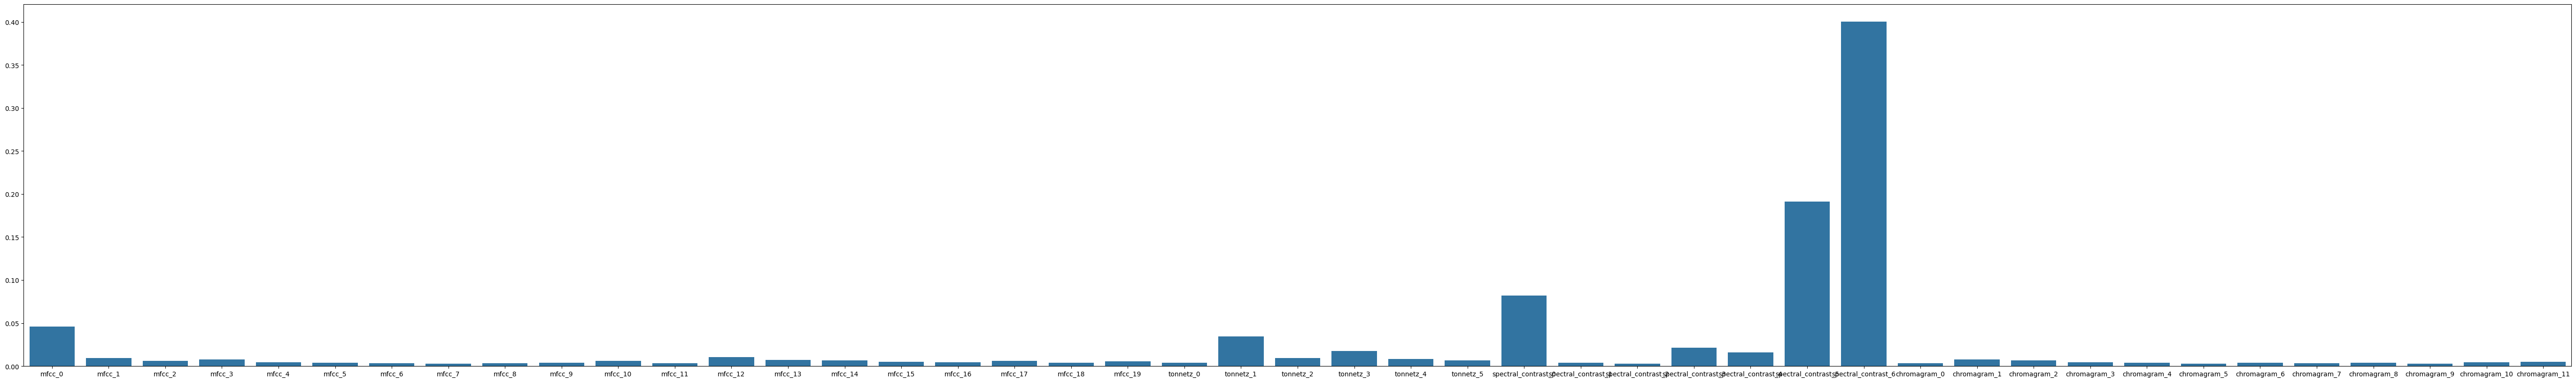

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
dicti=dict()
for i in range(len(X_train.columns)):
  dicti[X_train.columns[i]]=imp[i]

fig, ax = plt.subplots(figsize=(70, 10))
sns.barplot(dicti,ax=ax)

print(dicti)



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load dataset (example: Iris dataset)

# Create SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', C=4, probability=True)

# Train SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

# Print accuracy
accuracy = svm_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# Get probabilities of each class for each sample
probabilities = svm_classifier.predict_proba(X_test)
print("Probabilities:", probabilities)


In [ ]:
import numpy as np
print(df.describe())
print(df[df["lab"]==0].describe())
print(df[df["lab"]==1].describe())
print(len(df.columns)-2)


              mfcc_0         mfcc_1         mfcc_2         mfcc_3  \
count  131083.000000  131083.000000  131083.000000  131083.000000   
mean     -314.385891      78.142219       3.666386      15.569164   
std        21.131290      13.713406       9.333866       8.060108   
min      -454.790833      -3.635079     -46.964275     -31.076492   
25%      -326.146866      69.378582      -2.376403      10.241061   
50%      -312.546997      78.125031       3.644770      15.436701   
75%      -300.392838      86.868259       9.658875      20.728378   
max      -235.246277     146.044785      59.734688      64.655472   

              mfcc_4         mfcc_5         mfcc_6         mfcc_7  \
count  131083.000000  131083.000000  131083.000000  131083.000000   
mean      -14.443590     -19.124517     -18.384675     -17.728673   
std         7.277826       8.064926       6.437008       7.041329   
min       -58.236332     -49.783482     -48.025356     -42.709610   
25%       -18.952543     -24.0850

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame containing the data
y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]



X=df[["spectral_contrast_5","spectral_contrast_6"]]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data

# Upsample the minority class

smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

X=X_resampled
y=y_resampled

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_validate, KFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, log_loss, make_scorer
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.utils import resample

# Assuming 'df' is your DataFrame containing the data



# Initialize models
models = {
    'Naive Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False)  # XGBoost model
}

# Define evaluation metrics
scoring = {'accuracy': 'accuracy', 'f1_macro': 'f1_macro', 'roc_auc': 'roc_auc', 'neg_log_loss': 'neg_log_loss'}

# Initialize dictionaries to store evaluation metrics
evaluation_scores = {"test_"+metric: {} for metric in scoring}

# Define cross-validation strategy
kf = KFold(n_splits=10)

# Train and evaluate models
for name, model in models.items():
    print(f"---- {name} ----")

    # Perform cross-validation
    cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring, return_train_score=False)

    # Store evaluation metrics
    for metric, scores in cv_results.items():
        if metric != 'fit_time' and metric != 'score_time':  # Exclude timing information
            evaluation_scores[metric][name] = cv_results[metric]

    # Generate cross-validated predictions for classification report and confusion matrix
    y_pred_cv = cross_val_predict(model, X, y, cv=kf)

    # Print classification report and confusion matrix
    print("Classification Report:")
    print(classification_report(y, y_pred_cv, labels=np.unique(y)))
    print("Confusion Matrix:")
    print(confusion_matrix(y, y_pred_cv))
    print()



---- Naive Bayes ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81    117983
           1       0.92      0.62      0.74    117983

    accuracy                           0.78    235966
   macro avg       0.82      0.78      0.78    235966
weighted avg       0.82      0.78      0.78    235966

Confusion Matrix:
[[111418   6565]
 [ 44768  73215]]

---- Logistic Regression ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.75      0.73    117983
           1       0.74      0.70      0.72    117983

    accuracy                           0.72    235966
   macro avg       0.72      0.72      0.72    235966
weighted avg       0.72      0.72      0.72    235966

Confusion Matrix:
[[88421 29562]
 [35745 82238]]

---- Decision Tree ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85    117983
           1       0.86      0.84      0.85    117983

    accuracy                           0.85    235966
   macro avg       0.85      0.85      0.85    235966
weighted avg       0.85      0.85      0.85    235966

Confusion Matrix:
[[102306  15677]
 [ 19328  98655]]

---- Random Forest ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88    117983
           1       0.90      0.84      0.87    117983

    accuracy                           0.87    235966
   macro avg       0.87      0.87      0.87    235966
weighted avg       0.87      0.87      0.87    235966

Confusion Matrix:
[[107257  10726]
 [ 19283  98700]]

---- KNN ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88    117983
           1       0.92      0.81      0.86    117983

    accuracy                           0.87    235966
   macro avg       0.87      0.87      0.87    235966
weighted avg       0.87      0.87      0.87    235966

Confusion Matrix:
[[109195   8788]
 [ 22135  95848]]

---- XGBoost ----


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_base.py", line 75, in _average_binary_score
    return binary_metric(y_true, y_score, sample_weight=sample_weight)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py", line 339, in _binary_roc_auc_score

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83    117983
           1       0.85      0.80      0.82    117983

    accuracy                           0.83    235966
   macro avg       0.83      0.83      0.83    235966
weighted avg       0.83      0.83      0.83    235966

Confusion Matrix:
[[101507  16476]
 [ 24057  93926]]



In [ ]:
print(df.columns)

Index(['filename', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5',
       'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12',
       'mfcc_13', 'mfcc_14', 'mfcc_15', 'mfcc_16', 'mfcc_17', 'mfcc_18',
       'mfcc_19', 'tonnetz_0', 'tonnetz_1', 'tonnetz_2', 'tonnetz_3',
       'tonnetz_4', 'tonnetz_5', 'spectral_contrast_0', 'spectral_contrast_1',
       'spectral_contrast_2', 'spectral_contrast_3', 'spectral_contrast_4',
       'spectral_contrast_5', 'spectral_contrast_6', 'chromagram_0',
       'chromagram_1', 'chromagram_2', 'chromagram_3', 'chromagram_4',
       'chromagram_5', 'chromagram_6', 'chromagram_7', 'chromagram_8',
       'chromagram_9', 'chromagram_10', 'chromagram_11', 'lab'],
      dtype='object')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import pickle

# Assuming 'df' is your DataFrame containing the data
y=df.iloc[:,-1]
X=df.iloc[:,:-1]
del X["filename"]

# Upsample the minority class using SMOTE
smote = SMOTE(sampling_strategy="minority")
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())



# Continue with your code
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33)

# Initialize models
models = {

    #'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #"xgb":XGBClassifier(use_label_encoder=False)

}

# Train and evaluate models
accuracy_scores = {}
f1_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    f1_scores[name] = classification_report(y_test, y_pred, output_dict=True)['macro avg']['f1-score']

    print(f"---- {name} ----")
    print("Accuracy Score:", accuracy_scores[name])
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    if name=="Random Forest":
      imp=model.feature_importances_
    elif name=="xgb":
      impx=model.feature_importances_


# Assume 'model' is your trained model object
# Save the model to a file
    with open(name+".pkl", 'wb') as f:
      pickle.dump(model, f)


print(imp)
print(impx)


lab
1    117983
0    117983
Name: count, dtype: int64
---- Random Forest ----
Accuracy Score: 0.9695257419512258
Confusion Matrix:
[[38629   509]
 [ 1864 36867]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     39138
           1       0.99      0.95      0.97     38731

    accuracy                           0.97     77869
   macro avg       0.97      0.97      0.97     77869
weighted avg       0.97      0.97      0.97     77869

[0.02443865 0.01121625 0.008354   0.0073566  0.01344282 0.01559113
 0.01222528 0.01161218 0.00658651 0.00885183 0.00901785 0.00902297
 0.01191582 0.01056768 0.01065546 0.01522123 0.01289208 0.00879751
 0.00885559 0.00755333 0.00637374 0.026246   0.01237699 0.01777265
 0.01033213 0.01055849 0.11035828 0.00862885 0.00855749 0.02665333
 0.06215863 0.14079427 0.24698584 0.00703479 0.00907598 0.00900169
 0.0066231  0.00654681 0.00710775 0.0066913  0.00711553 0.00811542
 0.00594687 0.00774

NameError: name 'impx' is not defined

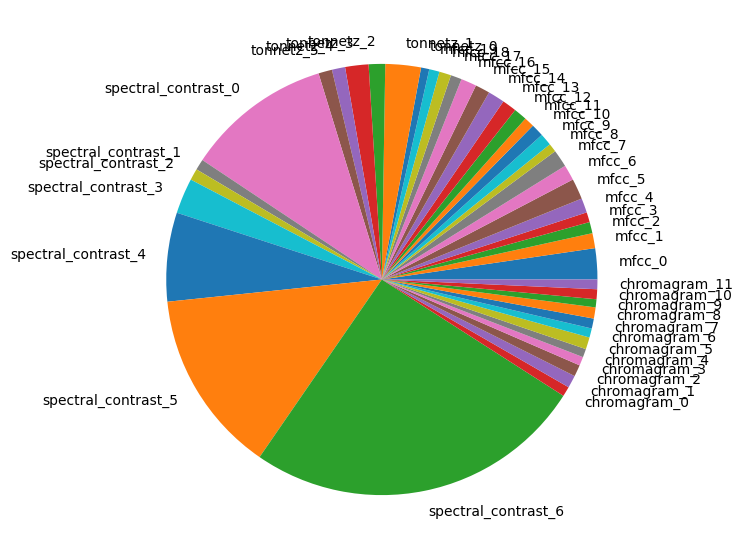

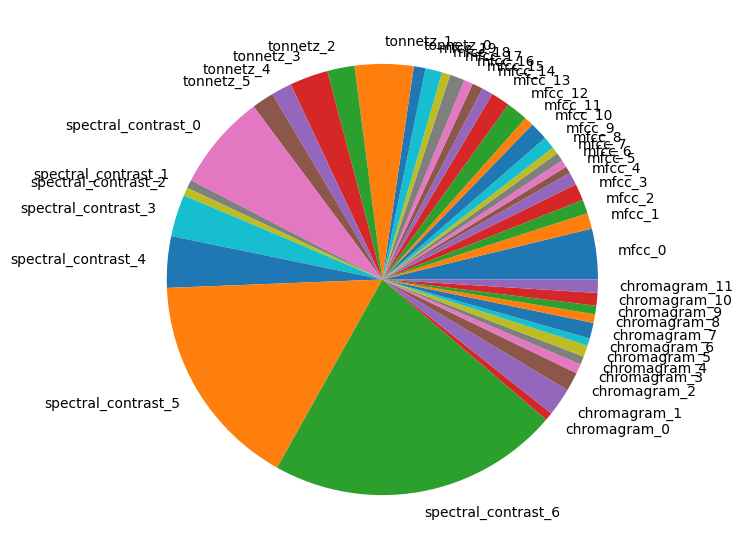

In [ ]:
imprf=[0.02325624, 0.01123786, 0.00844337, 0.00745554, 0.0108541, 0.01549248,
       0.01163505, 0.0130383, 0.00644218, 0.00913692, 0.0094436, 0.00761706,
       0.00982913, 0.01080362, 0.01247048, 0.01095425, 0.01166412, 0.00828521,
       0.00890097, 0.00771511, 0.00617548, 0.02661761, 0.0123442, 0.01748655,
       0.00991047, 0.01023198, 0.10909748, 0.008157, 0.00865361, 0.02655281,
       0.0665663, 0.1375755, 0.25526785, 0.00739985, 0.00939101, 0.0087144,
       0.00656456, 0.00628639, 0.00898921, 0.00683242, 0.00744527, 0.00838721,
       0.00605057, 0.00740911, 0.00721757]

impxgb=[0.03793402, 0.01185754, 0.01045041, 0.01244711, 0.00963039, 0.00528855,
        0.00550312, 0.00640025, 0.00524554, 0.00923086, 0.01360579, 0.00697629,
        0.01606205, 0.01419738, 0.00832806, 0.00796953, 0.00681397, 0.01115265,
        0.00631279, 0.01249085, 0.00873066, 0.0440936, 0.02035628, 0.02882042,
        0.01536839, 0.01654342, 0.07201568, 0.00627472, 0.00610682, 0.03149152,
        0.03851987, 0.1625968, 0.21852668, 0.00598359, 0.02090432, 0.01418571,
        0.00712099, 0.00624532, 0.00865853, 0.00550391, 0.0117284, 0.00649402,
        0.00638421, 0.00950043, 0.00994851]

import matplotlib.pyplot as plt
import seaborn as sns
dictirf=dict()
dictixgb=dict()
for i in range(len(X_train.columns)):
  dictirf[X_train.columns[i]]=imprf[i]
  dictixgb[X_train.columns[i]]=impxgb[i]
plt.figure(figsize=(7, 7))
plt.pie(dictirf.values(),labels=list(dictirf.keys()))
plt.show()
plt.figure(figsize=(7, 7))
plt.pie(dictixgb.values(),labels=list(dictixgb.keys()))
plt.show()





                       mfcc_0    mfcc_1    mfcc_2    mfcc_3    mfcc_4  \
mfcc_0               1.000000 -0.131630 -0.260162 -0.033443 -0.393773   
mfcc_1              -0.131630  1.000000 -0.476851 -0.388253 -0.054932   
mfcc_2              -0.260162 -0.476851  1.000000  0.311054  0.103899   
mfcc_3              -0.033443 -0.388253  0.311054  1.000000  0.296866   
mfcc_4              -0.393773 -0.054932  0.103899  0.296866  1.000000   
mfcc_5              -0.416569 -0.081053  0.247662 -0.093542  0.460903   
mfcc_6              -0.328999  0.361703 -0.056895 -0.129862  0.135147   
mfcc_7              -0.484321 -0.059359  0.273819  0.013990  0.421124   
mfcc_8              -0.188326 -0.026533  0.041002  0.118456  0.266057   
mfcc_9              -0.111956  0.048149 -0.046063 -0.144930  0.251680   
mfcc_10             -0.433516  0.122804  0.049247 -0.106271  0.304435   
mfcc_11             -0.182953 -0.071334  0.147032  0.191530  0.343141   
mfcc_12             -0.555670  0.058762  0.197445 -

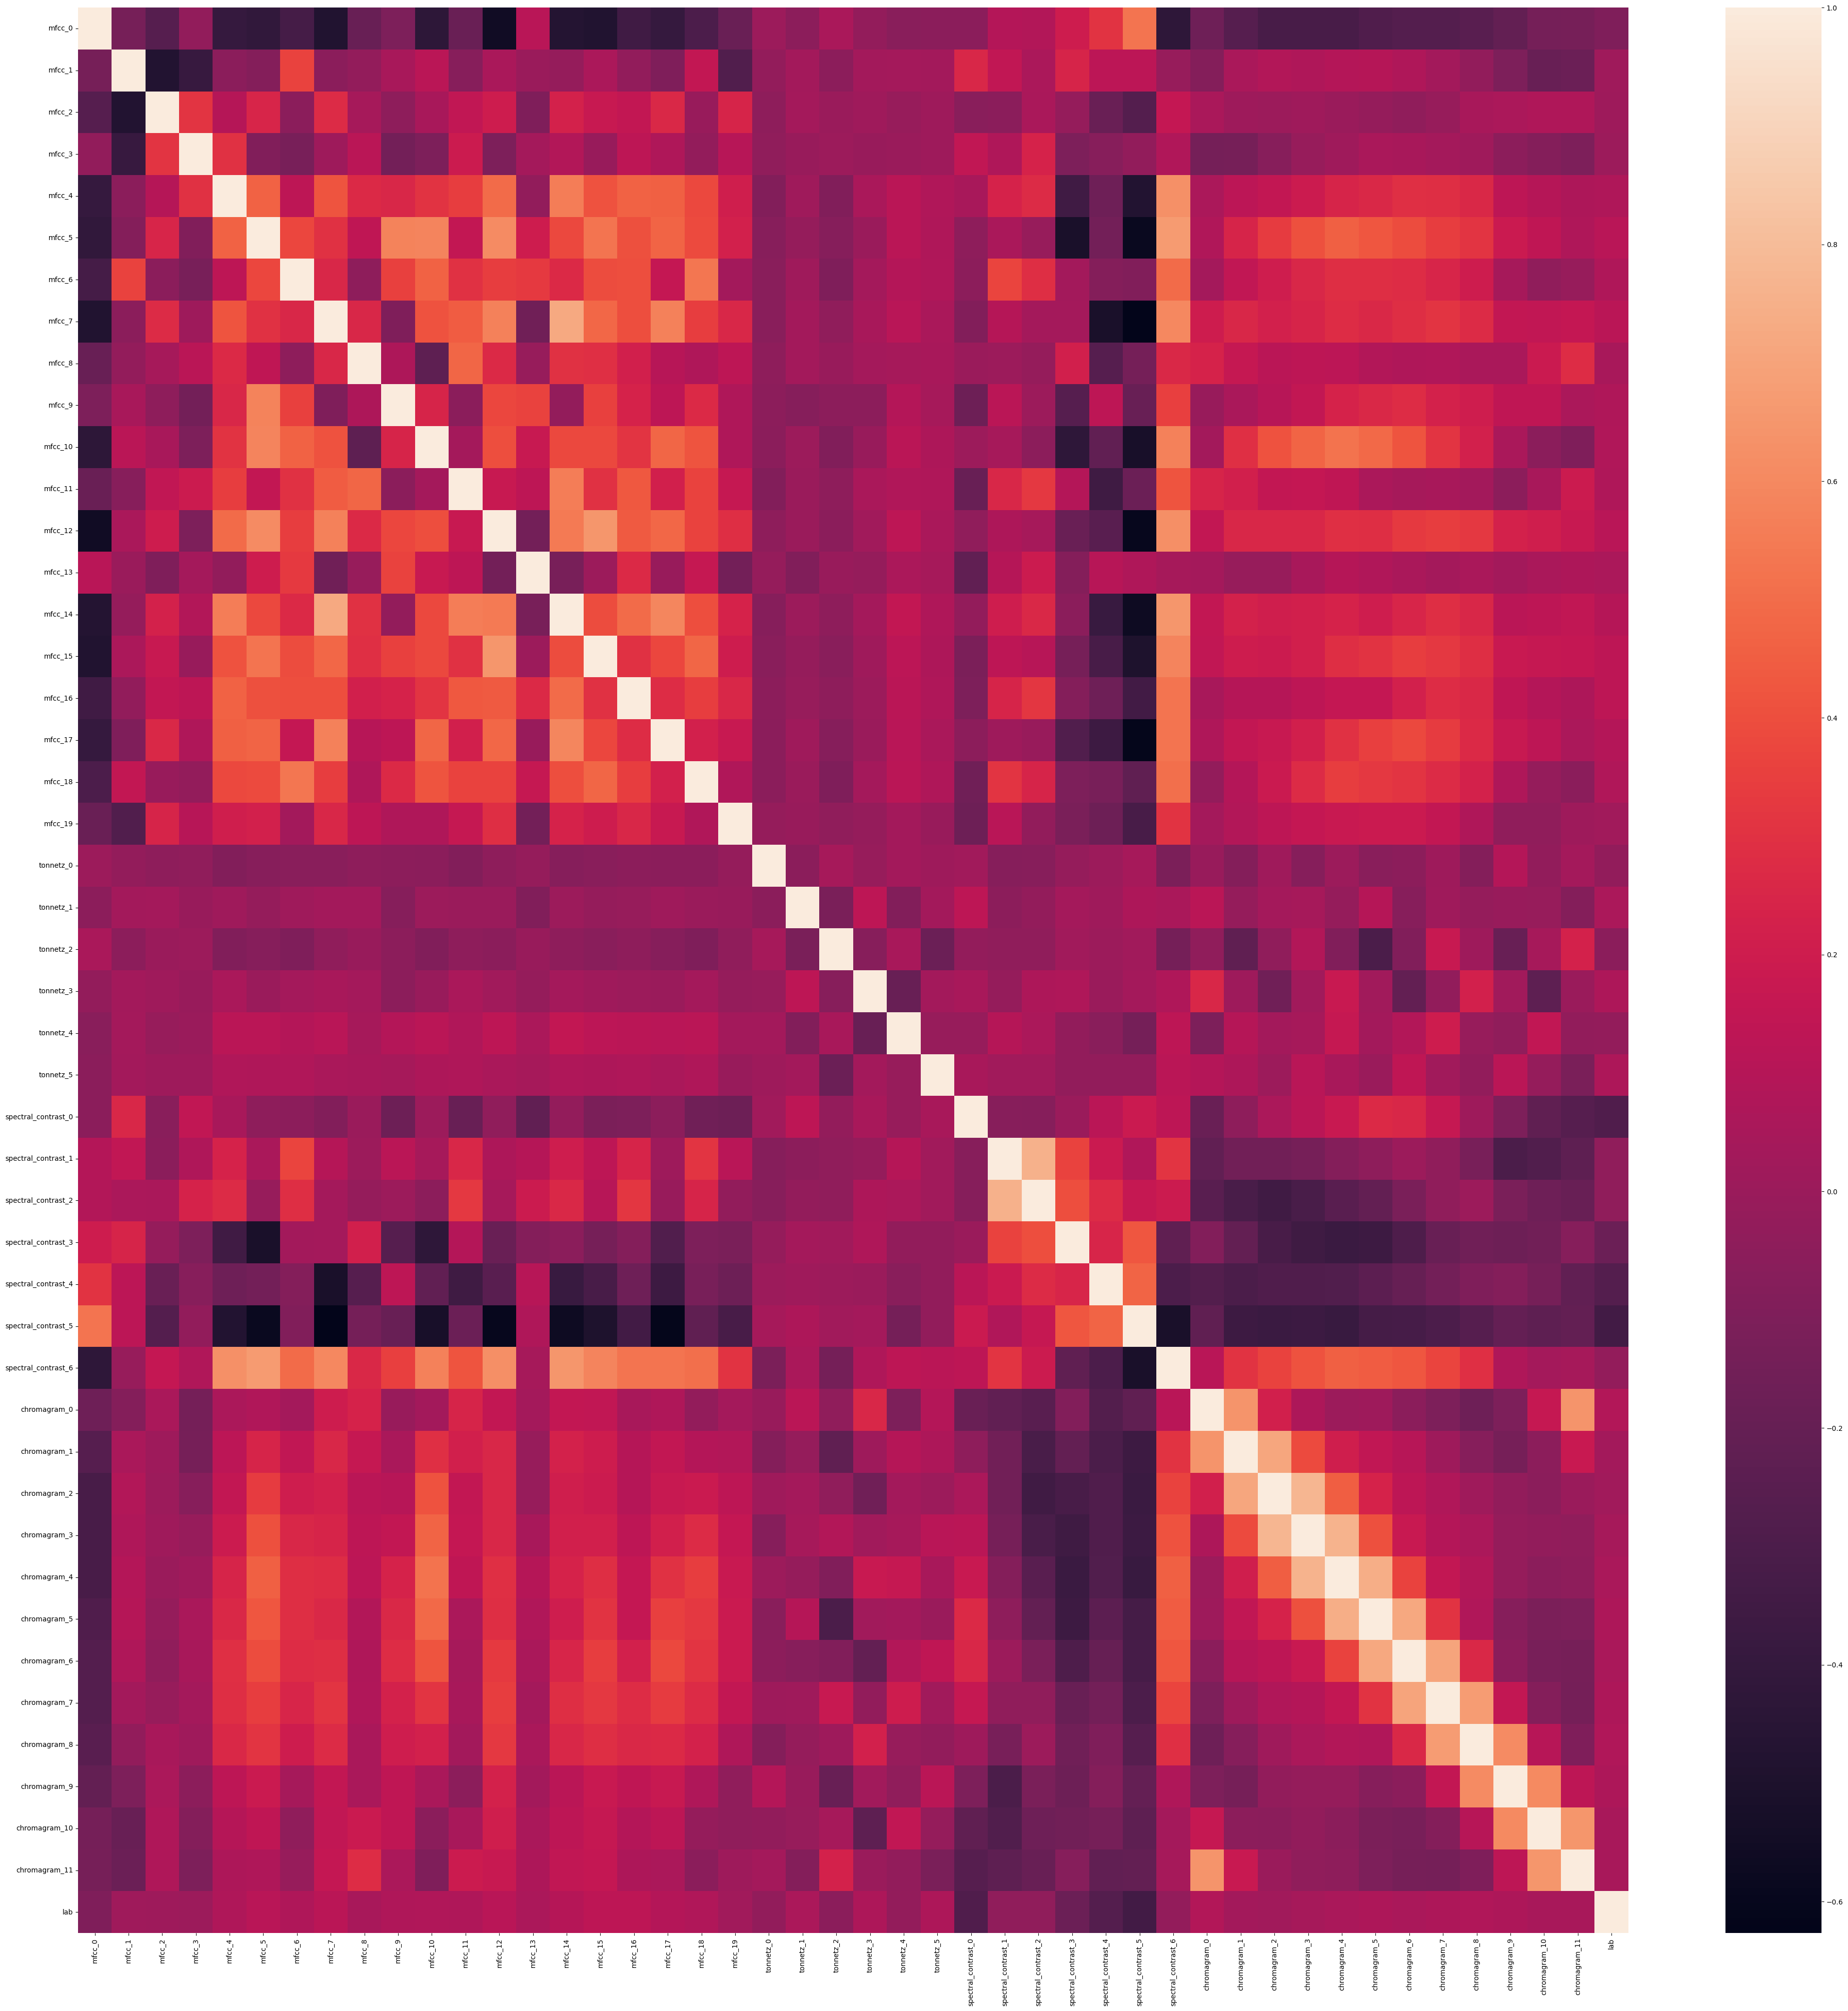

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df5=df

corr=df5.corr()
plt.figure(figsize=(50, 50))
sns.heatmap(corr)


print(corr)


